In [49]:
import pandas as pd
import datetime as dt
import numpy as np
from factor_analyzer import FactorAnalyzer, Rotator, calculate_kmo

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

from scipy import stats
from scipy.stats import pearsonr

In [2]:
data = pd.read_excel("Data_Questionnarie.xlsx", sheet_name="Raw Data")
data.head(3)

,時間戳記,請問您有否使用過GOGOVAN或LALAMOVE的服務？,介面外觀 [此程式視覺上令我滿意],介面外觀 [此程式的版面設計令我滿意],介面外觀 [我認為此程式在視覺上是吸引的],預約方便程度 [瀏覽貨物明細、價格等預約信息是容易的],預約方便程度 [我在預約和付款時沒有困難],預約方便程度 [此程式將我的訂單快速地交托給司機],服務選擇 [此程式可以選擇公司聲稱擁有的送貨服務],服務選擇 [此程式的服務類型能符合我的要求],...,口碑 [對尋求我建議的人，我推薦該公司],口碑 [我鼓勵朋友和其他人公司享用的送貨服務。],在一個月內，您曾使用過多少次以下送貨服務？ [GOGOVAN],在一個月內，您曾使用過多少次以下送貨服務？ [LALAMOVE],性別,年齡,每月收入,教育程度,您的職業是什麼？,您居住在甚麼地區?
0,2019-01-28 22:56:45.344000,有,4 同意,4 同意,3 中立,4 同意,4 同意,3 中立,4 同意,4 同意,...,4 同意,3 中立,1-3次,1-3次,男,18-30歲,$10000以下,專上教育,全職學生,NaN
1,2019-01-28 22:57:06.377000,無,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-29 10:12:10.173000,有,4 同意,4 同意,4 同意,4 同意,4 同意,4 同意,4 同意,4 同意,...,4 同意,4 同意,7-9次,7-9次,女,31-40歲,$10000-$15999,小學或以下,零售、住宿及膳食服務從業員,NaN


In [3]:
data.columns = ["Timestamp", "Y/N", "AA1", "AA2", "AA3", "BC1", "BC2", "BC3", "SC1", "SC2", "SC3", "PO1", "PO2", "PO3", "SF1", "SF2", "SF3", "TD1", "TD2", "TD3", "OR1", "OR2", "OR3", "CP1", "CP2", "CP3", "FM1", "FM2", "FM3", "SEC1", "SEC2", "SEC3", "PRI1", "PRI2", "PRI3", "SAT1", "SAT2", "SAT3", "RI1", "RI2", "RI3", "WM1", "WM2", "WM3", "Times_GOGOVAN", "Times_LALAMOVE", "Gender", "Age", "Monthly_Income", "Education_Level", "Occupation", "Living_District"]
data = data.replace({"有": "Y",
              "無": "N",
              "1 非常不同意": 1,
              "2 不同意": 2,
              "3 中立": 3,
              "4 同意": 4,
              "5 非常同意": 5,
              "0次": "0 time",              
              "1-3次": "1-3 times",
              "4-6次": "4-6 times",
              "7-9次": "7-9 times",
              "10次或以上": "10 times of above",
              "男": "Male",
              "女": "Female",
              "18-30歲": "18-30",
              "31-40歲": "31-40",
              "41-50歲": "41-50",
              "51-60歲": "51-60",
              "61歲或以上": "61 or above",
              "$10000以下": "$10000 or below",
              "$40000或以上": "$40000 or above",
              "小學或以下": "Primary level or below",
              "初中": "Junior secondary level",
              "高中": "Senior secondary level",
              "專上教育": "Tertiary level",
              "大學或以上": "University level or above",
              "全職學生": "Full-time student",
              "其他行業": "Others",
              "無業或待業人士": "Unemployed",
              "公共行政、社會、個人及醫護服務從業員": "Public administration, individual & medical industry",
              "金融、保險、地產、專業及商用服務從業員": "Finance, insurance, real estate & professional industry",
              "建造業從業員": "Construction industry",
              "教育行業": "Education industry",
              "進出口貿易及批發從業員": "Import & export trade & wholesale industry",
              "運輸、倉庫、郵政及速遞服務、資訊及通訊從業員": "Transportation, warehousing, express, IT industry",
              "零售、住宿及膳食服務從業員": "Retailing, accommodation & catering industry",
              "製造業從業員": "Manufacturing industry",
              "新界西": "New Territories West",
              "新界東": "New Territories East",
              "九龍西": "Kowloon West",
              "九龍東": "Kowloon East",
              "香港島": "Hong Kong Island",
              
             })

data["Gender"] = data["Gender"].astype("category")
data["Times_GOGOVAN"] = data["Times_GOGOVAN"].astype("category")
data["Times_LALAMOVE"] = data["Times_LALAMOVE"].astype("category")
data["Age"] = data["Age"].astype("category")
data["Monthly_Income"] = data["Monthly_Income"].astype("category")
data["Education_Level"] = data["Education_Level"].astype("category")
data["Occupation"] = data["Occupation"].astype("category")
data["Living_District"] = data["Living_District"].astype("category")

data = data[data["Y/N"] == "Y"]
data.head(3)

,Timestamp,Y/N,AA1,AA2,AA3,BC1,BC2,BC3,SC1,SC2,...,WM2,WM3,Times_GOGOVAN,Times_LALAMOVE,Gender,Age,Monthly_Income,Education_Level,Occupation,Living_District
0,2019-01-28 22:56:45.344000,Y,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,...,4.0,3.0,1-3 times,1-3 times,Male,18-30,$10000 or below,Tertiary level,Full-time student,NaN
2,2019-01-29 10:12:10.173000,Y,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,7-9 times,7-9 times,Female,31-40,$10000-$15999,Primary level or below,"Retailing, accommodation & catering industry",NaN
9,2019-02-02 16:30:53.482000,Y,4.0,4.0,2.0,4.0,4.0,5.0,5.0,4.0,...,4.0,4.0,1-3 times,0 time,Male,18-30,$10000-$15999,University level or above,Others,New Territories West


In [4]:
temporarylist = []
for i in data.loc["763":"779", "Timestamp"].values:
    temporarylist.append(pd.to_datetime(i[0:8] + i[11:]))
data.loc["763":"779", "Timestamp"] = (pd.Series(data = temporarylist, index = data.index[-9:]))
data.loc["763":"779", "Timestamp"] = pd.to_datetime(data.loc["763":"779", "Timestamp"]) + pd.DateOffset(hours = 12)

data.loc["0":"759", "Timestamp"] = pd.to_datetime(data.loc["0":"759", "Timestamp"], unit="ns")
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["Timestamp"]
data

,Timestamp,Y/N,AA1,AA2,AA3,BC1,BC2,BC3,SC1,SC2,...,WM2,WM3,Times_GOGOVAN,Times_LALAMOVE,Gender,Age,Monthly_Income,Education_Level,Occupation,Living_District
0,2019-01-28 22:56:45.344,Y,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,...,4.0,3.0,1-3 times,1-3 times,Male,18-30,$10000 or below,Tertiary level,Full-time student,NaN
2,2019-01-29 10:12:10.173,Y,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,7-9 times,7-9 times,Female,31-40,$10000-$15999,Primary level or below,"Retailing, accommodation & catering industry",NaN
9,2019-02-02 16:30:53.482,Y,4.0,4.0,2.0,4.0,4.0,5.0,5.0,4.0,...,4.0,4.0,1-3 times,0 time,Male,18-30,$10000-$15999,University level or above,Others,New Territories West
12,2019-02-03 12:06:05.065,Y,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,...,4.0,4.0,0 time,0 time,Female,18-30,$10000 or below,University level or above,Full-time student,New Territories East
15,2019-02-03 13:22:28.820,Y,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,4.0,4.0,7-9 times,7-9 times,Female,51-60,$10000 or below,University level or above,Manufacturing industry,New Territories East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,2019-03-01 15:58:34.000,Y,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,...,3.0,3.0,1-3 times,1-3 times,Female,31-40,$16000-$29999,University level or above,Manufacturing industry,New Territories East
772,2019-03-01 16:00:23.000,Y,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,3.0,1-3 times,0 time,Male,18-30,$10000-$15999,University level or above,Full-time student,Hong Kong Island
776,2019-03-01 16:02:38.000,Y,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3.0,4.0,1-3 times,0 time,Male,18-30,$10000-$15999,Tertiary level,Construction industry,New Territories West
777,2019-03-01 16:03:53.000,Y,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3.0,4.0,4-6 times,0 time,Male,41-50,$30000-$39999,University level or above,"Public administration, individual & medical in...",New Territories East


2019-02-04      1
2019-02-02      2
2019-01-28      3
2019-01-29      4
2019-02-03      8
2019-02-18     12
2019-02-07     17
2019-03-01     26
2019-02-19     35
2019-02-21     50
2019-02-20     67
2019-02-09     85
2019-02-11    110
2019-02-22    139
2019-02-08    171
2019-02-10    210
dtype: int64


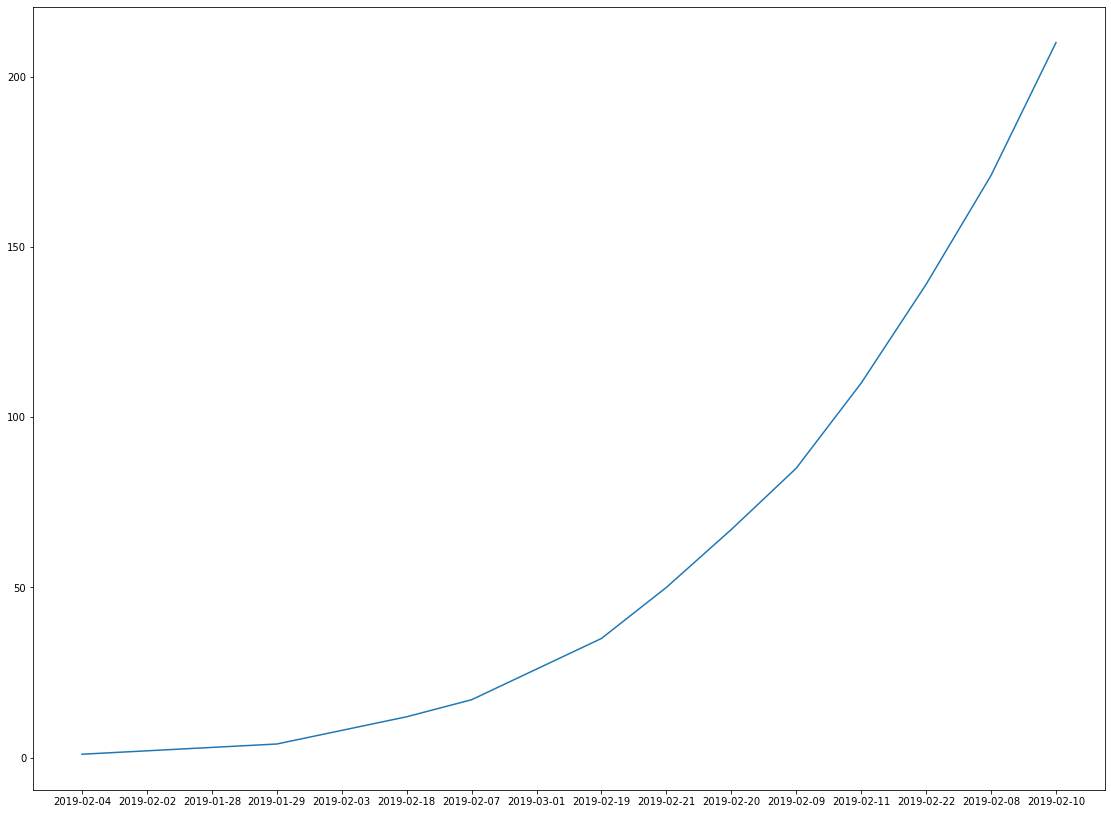

In [5]:
plt.figure(figsize=(19.2, 14.4))
temporarylist = []
data_time = []
for i in data["Timestamp"]:
    temporarylist.append(str(i))
for i in temporarylist:
    data_time.append(i[0:10])
data_time = pd.Series(data_time).value_counts()
data_time.sort_values(ascending = True, inplace = True)
for i in range(len(data_time)):
    if i != 0:
        data_time[i] += data_time[i - 1]
print(data_time)
plt.plot(data_time)

        Frequency  Percentage
Male          107        0.51
Female        103        0.49


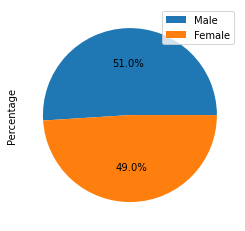

In [6]:
data_gender = pd.DataFrame(data = data["Gender"].value_counts())
data_gender.columns = ["Frequency"]
data_gender.insert(loc = 1, column = "Percentage", value = 0)

Male_percentage = data_gender.loc["Male", "Frequency"] / (data_gender.loc["Male", "Frequency"] + data_gender.loc["Female", "Frequency"])
Female_percentage = data_gender.loc["Female", "Frequency"] / (data_gender.loc["Male", "Frequency"] + data_gender.loc["Female", "Frequency"])
data_gender["Percentage"] = float(data_gender.loc["Male", "Percentage"])

data_gender.loc["Male", "Percentage"] = round(Male_percentage, 2)
data_gender.loc["Female", "Percentage"] = round(Female_percentage, 2)
print(data_gender)
data_gender_pie = data_gender["Percentage"]
data_gender["Percentage"].plot(kind = "pie", style = "bmh", legend = True, labels = None, autopct='%1.1f%%')

             Frequency  Percentage
41-50               68        0.32
18-30               56        0.27
31-40               33        0.16
51-60               32        0.15
61 or above         21        0.10


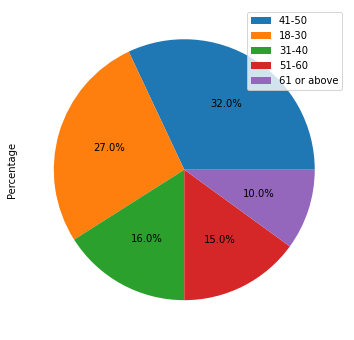

In [7]:
data_age = pd.DataFrame(data = data["Age"].value_counts())
data_age.columns = ["Frequency"]
data_age.insert(loc = 1, column = "Percentage", value = 0)
data_age["Frequency"], data_age["Percentage"] = np.array(data_age["Frequency"]), np.array(data_age["Percentage"])
data_age["Percentage"] = round(data_age["Frequency"] / data_age["Frequency"].sum(), 2)
print(data_age)
data_age["Percentage"].plot(kind = "pie", style = "bmh", legend = True, labels = None, figsize = (6, 6), autopct='%1.1f%%')

                 Frequency  Percentage
$16000-$29999           81        0.39
$10000 or below         46        0.22
$10000-$15999           40        0.19
$30000-$39999           27        0.13
$40000 or above         16        0.08


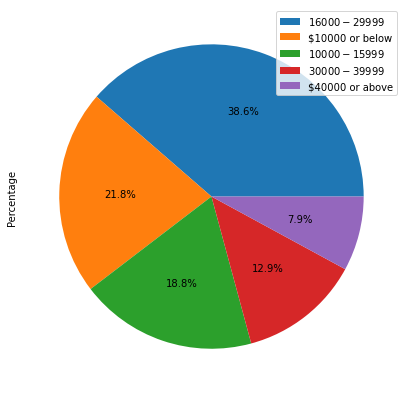

In [8]:
data_income = pd.DataFrame(data = data["Monthly_Income"].value_counts())
data_income.columns = ["Frequency"]
data_income.insert(loc = 1, column = "Percentage", value = 0)
data_income["Frequency"], data_income["Percentage"] = np.array(data_income["Frequency"]), np.array(data_income["Percentage"])
data_income["Percentage"] = round(data_income["Frequency"] / data_income["Frequency"].sum(), 2)
print(data_income)
data_income["Percentage"].plot(kind = "pie", style = "bmh", legend = True, labels = None, figsize = (7, 7), autopct='%1.1f%%')

                           Frequency  Percentage
Senior secondary level            67        0.32
University level or above         63        0.30
Tertiary level                    54        0.26
Junior secondary level            18        0.09
Primary level or below             8        0.04


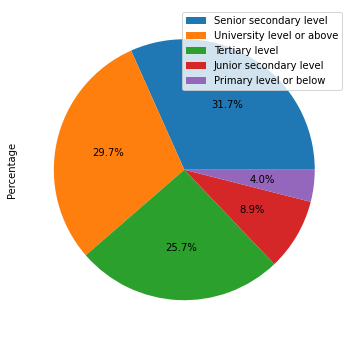

In [9]:
data_edu = pd.DataFrame(data = data["Education_Level"].value_counts())
data_edu.columns = ["Frequency"]
data_edu.insert(loc = 1, column = "Percentage", value = 0)
data_edu["Frequency"], data_edu["Percentage"] = np.array(data_edu["Frequency"]), np.array(data_edu["Percentage"])
data_edu["Percentage"] = round(data_edu["Frequency"] / data_edu["Frequency"].sum(), 2)
print(data_edu)
data_edu["Percentage"].plot(kind = "pie", style = "bmh", legend = True, labels = None, figsize = (6, 6), autopct='%1.1f%%')

                                                    Frequency  Percentage
Retailing, accommodation & catering industry               35        0.17
Transportation, warehousing, express, IT industry          29        0.14
Import & export trade & wholesale industry                 28        0.13
Construction industry                                      27        0.13
Full-time student                                          22        0.10
Public administration, individual & medical ind...         20        0.10
Finance, insurance, real estate & professional ...         20        0.10
Others                                                     19        0.09
Manufacturing industry                                      5        0.02
Unemployed                                                  3        0.01
Education industry                                          2        0.01


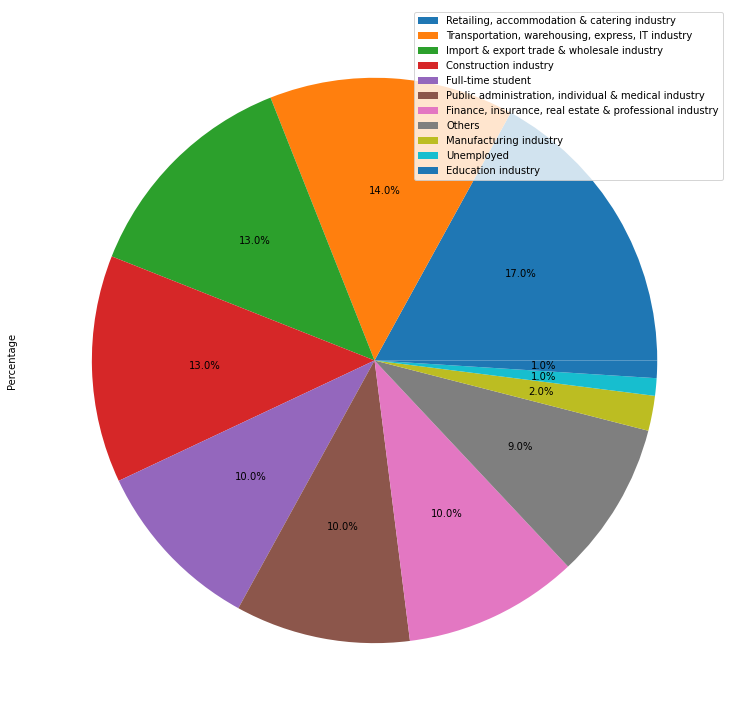

In [10]:
data_occupation = pd.DataFrame(data = data["Occupation"].value_counts())
data_occupation.columns = ["Frequency"]
data_occupation.insert(loc = 1, column = "Percentage", value = 0)
data_occupation["Frequency"], data_occupation["Percentage"] = np.array(data_occupation["Frequency"]), np.array(data_occupation["Percentage"])
data_occupation["Percentage"] = round(data_occupation["Frequency"] / data_occupation["Frequency"].sum(), 2)
print(data_occupation)
data_occupation["Percentage"].plot(kind = "pie", style = "bmh", legend = True, labels = None, figsize = (13, 13), autopct='%1.1f%%')

                      Frequency  Percentage
Kowloon East                 70        0.33
New Territories West         51        0.24
New Territories East         36        0.17
Kowloon West                 35        0.17
Hong Kong Island             16        0.08
Missing Data                  2        0.01


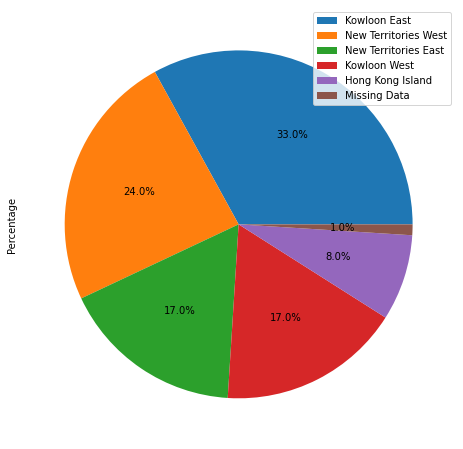

In [11]:
data["Living_District"] = data["Living_District"].replace({None: "Missing Data"})
data_district = pd.DataFrame(data = data["Living_District"].value_counts())
data_district.columns = ["Frequency"]
data_district.insert(loc = 1, column = "Percentage", value = 0)
data_district["Frequency"], data_district["Percentage"] = np.array(data_district["Frequency"]), np.array(data_district["Percentage"])
data_district["Percentage"] = round(data_district["Frequency"] / data_district["Frequency"].sum(), 2)
print(data_district)
data_district["Percentage"].plot(kind = "pie", style = "bmh", legend = True, labels = None, figsize = (8, 8), autopct='%1.1f%%')

           Frequency  Percentage
0 time           157       0.748
1-3 times         26       0.124
4-6 times         16       0.076
7-9 times         11       0.052


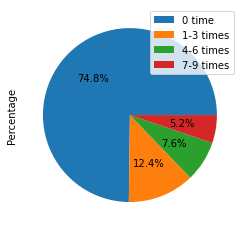

In [12]:
data_times_lalamove = pd.DataFrame(data = data["Times_LALAMOVE"].value_counts())
data_times_lalamove.columns = ["Frequency"]
data_times_lalamove.insert(loc = 1, column = "Percentage", value = 0)
data_times_lalamove["Frequency"], data_times_lalamove["Percentage"] = np.array(data_times_lalamove["Frequency"]), np.array(data_times_lalamove["Percentage"])
data_times_lalamove["Percentage"] = round(data_times_lalamove["Frequency"] / data_times_lalamove["Frequency"].sum(), 3)
print(data_times_lalamove)
data_times_lalamove["Percentage"].plot(kind = "pie", style = "bmh", legend = True, labels = None, autopct='%1.1f%%')

                   Frequency  Percentage
0 time                    12       0.057
1-3 times                 65       0.310
4-6 times                 53       0.252
7-9 times                 68       0.324
10 times of above         12       0.057


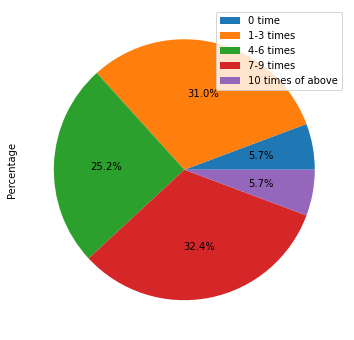

In [13]:
data_times_gogovan = pd.DataFrame(data = data["Times_GOGOVAN"].value_counts())
data_times_gogovan.columns = ["Frequency"]
data_times_gogovan = data_times_gogovan.reindex(["0 time", "1-3 times", "4-6 times", "7-9 times", "10 times of above"])
data_times_gogovan.insert(loc = 1, column = "Percentage", value = 0)
data_times_gogovan["Frequency"], data_times_gogovan["Percentage"] = np.array(data_times_gogovan["Frequency"]), np.array(data_times_gogovan["Percentage"])
data_times_gogovan["Percentage"] = round(data_times_gogovan["Frequency"] / data_times_gogovan["Frequency"].sum(), 3)
print(data_times_gogovan)
data_times_gogovan["Percentage"].plot(kind = "pie", style = "bmh", legend = True, labels = None, figsize = (6, 6), autopct='%1.1f%%')

In [14]:
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return round(cronbach_alpha, 3)

In [15]:
data_AA = pd.DataFrame(data = [data["AA1"], data["AA2"], data["AA3"]])
data_AA = data_AA.transpose()
data_BC = pd.DataFrame(data = [data["BC1"], data["BC2"], data["BC3"]])
data_BC = data_BC.transpose()
data_SC = pd.DataFrame(data = [data["SC1"], data["SC2"], data["SC3"]])
data_SC = data_SC.transpose()
data_PO = pd.DataFrame(data = [data["PO1"], data["PO2"], data["PO3"]])
data_PO = data_PO.transpose()
data_SF = pd.DataFrame(data = [data["SF1"], data["SF2"], data["SF3"]])
data_SF = data_SF.transpose()
data_TD = pd.DataFrame(data = [data["TD1"], data["TD2"], data["TD3"]])
data_TD = data_TD.transpose()
data_OR = pd.DataFrame(data = [data["OR1"], data["OR2"], data["OR3"]])
data_OR = data_OR.transpose()
data_CP = pd.DataFrame(data = [data["CP1"], data["CP2"], data["CP3"]])
data_CP = data_CP.transpose()
data_FM = pd.DataFrame(data = [data["FM1"], data["FM2"], data["FM3"]])
data_FM = data_FM.transpose()
data_SEC = pd.DataFrame(data = [data["SEC1"], data["SEC2"], data["SEC3"]])
data_SEC = data_SEC.transpose()
data_PRI = pd.DataFrame(data = [data["PRI1"], data["PRI2"], data["PRI3"]])
data_PRI = data_PRI.transpose()
data_SAT = pd.DataFrame(data = [data["SAT1"], data["SAT2"], data["SAT3"]])
data_SAT = data_SAT.transpose()

factors = ["App aesthetics (AA)", "Booking convenience (BC)", "Service choice (BC)", "Price offerings (PO)", "System functionality (SF)", "Timeliness of delivery (TD)", "Order reliability (OR)", "Couriers performance (CP)", "Feedback mechanism (FM)", "Security (SEC)", "Privacy (PRI)", "Customer satisfaction (SAT)"]   
data_reliability_test = pd.DataFrame(data = {"Cronbach's Alpha": [cronbach_alpha(data_AA), 
                                                                  cronbach_alpha(data_BC),
                                                                  cronbach_alpha(data_SC),
                                                                  cronbach_alpha(data_PO),
                                                                  cronbach_alpha(data_SF),
                                                                  cronbach_alpha(data_TD),
                                                                  cronbach_alpha(data_OR),
                                                                  cronbach_alpha(data_CP),
                                                                  cronbach_alpha(data_FM),
                                                                  cronbach_alpha(data_SEC),
                                                                  cronbach_alpha(data_PRI),
                                                                  cronbach_alpha(data_SAT)],
                                             "N of Items": 3},
                                     index = factors
                                    )

data_reliability_test

,Cronbach's Alpha,N of Items
App aesthetics (AA),0.923,3
Booking convenience (BC),0.886,3
Service choice (BC),0.891,3
Price offerings (PO),0.913,3
System functionality (SF),0.889,3
Timeliness of delivery (TD),0.898,3
Order reliability (OR),0.913,3
Couriers performance (CP),0.931,3
Feedback mechanism (FM),0.926,3
Security (SEC),0.912,3


In [16]:
data_factor_analysis1 = pd.DataFrame(data = [data["SC2"], data["PO1"], data["PO3"], data["TD2"], data["SEC1"], data["SEC2"], data["SEC3"]])
data_factor_analysis1 = data_factor_analysis1.transpose()
data_factor_analysis1.head()

,SC2,PO1,PO3,TD2,SEC1,SEC2,SEC3
0,4.0,4.0,5.0,2.0,4.0,4.0,4.0
2,4.0,4.0,4.0,3.0,4.0,5.0,4.0
9,4.0,4.0,5.0,3.0,4.0,4.0,4.0
12,3.0,4.0,4.0,3.0,3.0,2.0,3.0
15,5.0,4.0,4.0,5.0,4.0,4.0,4.0


In [17]:
data_factor_analysis2 = pd.DataFrame(data = [data["AA2"], data["AA3"], data["OR2"], data["OR3"], data["FM2"], data["FM3"], data["SAT1"], data["SAT3"]])
data_factor_analysis2 = data_factor_analysis2.transpose()
data_factor_analysis2.head()

,AA2,AA3,OR2,OR3,FM2,FM3,SAT1,SAT3
0,4.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0
2,4.0,4.0,3.0,3.0,3.0,5.0,4.0,4.0
9,4.0,2.0,3.0,5.0,2.0,2.0,4.0,5.0
12,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
15,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0


In [18]:
data_factor_analysis3 = pd.DataFrame(data = [data["BC2"], data["BC3"], data["SF1"], data["SF3"], data["CP1"], data["CP3"], data["PRI1"], data["PRI2"], data["PRI3"]])
data_factor_analysis3 = data_factor_analysis3.transpose()
data_factor_analysis3.head()

,BC2,BC3,SF1,SF3,CP1,CP3,PRI1,PRI2,PRI3
0,4.0,3.0,4.0,2.0,3.0,4.0,3.0,3.0,4.0
2,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0
9,4.0,5.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
12,3.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0
15,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0


Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [23]:
kmo_all, kmo_model1 = calculate_kmo(data_factor_analysis1)
kmo_all, kmo_model2 = calculate_kmo(data_factor_analysis2)
kmo_all, kmo_model3 = calculate_kmo(data_factor_analysis3)
print(f"KMO = {round(kmo_model1, 3)} for data set 1")
print(f"KMO = {round(kmo_model2, 3)} for data set 2")
print(f"KMO = {round(kmo_model3, 3)} for data set 3")

KMO = 0.838 for data set 1
KMO = 0.851 for data set 2
KMO = 0.843 for data set 3


In [28]:
efa1 = FactorAnalyzer(n_factors = 4, rotation = "varimax", method = "principal")
efa1.fit(data_factor_analysis1)
loadings1 = np.round(efa1.loadings_, 3)
df_efa1 = pd.DataFrame(data = loadings1, index = ["SC2", "PO1", "PO3", "TD2", "SEC1", "SEC2", "SEC3"], columns = ["Security", "Price Offerings", "Service choice", "Timeliness of delivery"])
df_efa1[df_efa1 > 0.6].replace({None: ""})

,Security,Price Offerings,Service choice,Timeliness of delivery
SC2,,,0.842,
PO1,,0.857,,
PO3,,0.723,,
TD2,,,,0.879
SEC1,0.824,,,
SEC2,0.784,,,
SEC3,0.859,,,


In [29]:
efa2 = FactorAnalyzer(n_factors = 4, rotation = "varimax", method = "principal")
efa2.fit(data_factor_analysis2)
loadings2 = np.round(efa2.loadings_, 3)
df_efa2 = pd.DataFrame(data = loadings2, index = ["AA2", "AA3", "OR2", "OR3", "FM2", "FM3", "SAT1", "SAT3"], columns = ["Customer satisfaction", "Feedback mechanism", "app aesthetics", "Order reliability"])
df_efa2[df_fa2 > 0.6].replace({None: ""})

,Customer satisfaction,Feedback mechanism,app aesthetics,Order reliability
AA2,,,0.822,
AA3,,,0.656,
OR2,,,,0.746
OR3,,,,0.765
FM2,,0.836,,
FM3,,0.781,,
SAT1,0.805,,,
SAT3,0.77,,,


In [31]:
efa3 = FactorAnalyzer(n_factors = 4, rotation = "varimax", method = "principal")
efa3.fit(data_factor_analysis3)
loadings3 = np.round(efa3.loadings_, 3)
df_efa3 = pd.DataFrame(data = loadings3, index = ["BC2", "BC3", "SF1", "SF3", "CP1", "CP3", "PRI1", "PRI2", "PRI3"], columns = ["Privacy", "System functionality", "Couriers performance", "Booking convenience"])
df_efa3[df_efa3 > 0.6].replace({None: ""})

,Privacy,System functionality,Couriers performance,Booking convenience
BC2,,,,0.855
BC3,,,,0.675
SF1,,0.773,,
SF3,,0.798,,
CP1,,,0.804,
CP3,,,0.791,
PRI1,0.835,,,
PRI2,0.877,,,
PRI3,0.801,,,


In [34]:
var_efa1 = np.round(efa1.get_factor_variance(), 5)[-1][-1]
var_efa2 = np.round(efa2.get_factor_variance(), 5)[-1][-1]
var_efa3 = np.round(efa3.get_factor_variance(), 5)[-1][-1]

print(f"Total variance explained for efa1 = {var_efa1}") 
print(f"Total variance explained for efa1 = {var_efa2}")
print(f"Total variance explained for efa1 = {var_efa3}") 

Total variance explained for efa1 = 0.91544
Total variance explained for efa1 = 0.91972
Total variance explained for efa1 = 0.89001


In [46]:
app_aesthetics = data["AA2"] + data["AA3"]
booking_convenience = data["BC2"] + data["BC3"]
service_choice = data["SC2"]
price_offerings = data["PO1"] + data["PO3"]
system_functionality = data["SF1"] + data["SF3"]
timeliness_of_delivery = data["TD2"]
order_reliability = data["OR2"] + data["OR3"]
couriers_performance = data["CP1"] + data["CP3"]
feedback_mechanism = data["FM2"] + data["FM3"]
security = data["SEC1"] + data["SEC2"] + data["SEC3"]
privacy = data["PRI1"] + data["PRI2"] + data["PRI3"]

customer_satisfaction = (data["SAT1"] + data["SAT3"]) / 2

app_design = (app_aesthetics + booking_convenience + service_choice + price_offerings + system_functionality) / 9
delivery_fulfillment = (timeliness_of_delivery + order_reliability) / 3
customer_service = (couriers_performance + feedback_mechanism) / 4
security_or_privacy = (security + privacy) / 6

age_quantified = data["Age"]
age_quantified = age_quantified.replace({"18-30": 1, 
                                         "31-40": 2,
                                         "41-50": 3,
                                         "51-60": 4,
                                         "61 or above": 5
                                        })
monthly_income_quantified = data["Monthly_Income"]
monthly_income_quantified = monthly_income_quantified.replace({"$10000 or below": 1,
                                                               "$10000-$15999": 2,
                                                               "$16000-$29999": 3,
                                                               "$30000-$39999": 4,
                                                               "$40000 or above": 5
                                                              })

data_correlation = pd.DataFrame(data = [app_aesthetics, booking_convenience, service_choice, price_offerings, system_functionality, timeliness_of_delivery, order_reliability, couriers_performance, feedback_mechanism, security, privacy])
data_correlation = data_correlation.transpose()
data_correlation.columns = ["App Aesthetics", "Booking Convenience", "Service Choice", "Price Offerings", "System Functionality", "Timeliness of Delivery", "Order Reliability", "Couriers Performance", "Feedback Mechanism", "Security", "Privacy"]
round(data_correlation.corr(), 3) 

,App Aesthetics,Booking Convenience,Service Choice,Price Offerings,System Functionality,Timeliness of Delivery,Order Reliability,Couriers Performance,Feedback Mechanism,Security,Privacy
App Aesthetics,1.000,0.800,0.758,0.808,0.736,0.694,0.774,0.720,0.749,0.661,0.680
Booking Convenience,0.800,1.000,0.824,0.791,0.752,0.595,0.773,0.684,0.660,0.654,0.582
Service Choice,0.758,0.824,1.000,0.672,0.698,0.603,0.758,0.615,0.595,0.620,0.532
Price Offerings,0.808,0.791,0.672,1.000,0.830,0.631,0.748,0.788,0.729,0.686,0.696
System Functionality,0.736,0.752,0.698,0.830,1.000,0.573,0.727,0.719,0.690,0.668,0.616
Timeliness of Delivery,0.694,0.595,0.603,0.631,0.573,1.000,0.721,0.696,0.699,0.583,0.585
Order Reliability,0.774,0.773,0.758,0.748,0.727,0.721,1.000,0.795,0.712,0.707,0.623
Couriers Performance,0.720,0.684,0.615,0.788,0.719,0.696,0.795,1.000,0.743,0.726,0.685
Feedback Mechanism,0.749,0.660,0.595,0.729,0.690,0.699,0.712,0.743,1.000,0.734,0.728
Security,0.661,0.654,0.620,0.686,0.668,0.583,0.707,0.726,0.734,1.000,0.795


In [63]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
    return pvalues
calculate_pvalues(data_correlation) 

,App Aesthetics,Booking Convenience,Service Choice,Price Offerings,System Functionality,Timeliness of Delivery,Order Reliability,Couriers Performance,Feedback Mechanism,Security,Privacy
App Aesthetics,0,4.92847e-48,2.10418e-40,9.18726e-50,4.66498e-37,1.62212e-31,4.04177e-43,7.15718e-35,5.08733e-39,1.05647e-27,8.18823e-30
Booking Convenience,4.92847e-48,0,3.82395e-53,3.43413e-46,1.87315e-39,1.78452e-21,6.20924e-43,2.4168e-30,1.30786e-27,5.53171e-27,1.97251e-20
Service Choice,2.10418e-40,3.82395e-53,0,5.45523e-29,4.7495e-32,3.29636e-22,1.74908e-40,3.35532e-23,1.69101e-21,1.02231e-23,9.39679e-17
Price Offerings,9.18726e-50,3.43413e-46,5.45523e-29,0,1.03122e-54,1.0016e-24,6.29253e-39,1.27993e-45,3.82762e-36,1.46773e-30,8.27323e-32
System Functionality,4.66498e-37,1.87315e-39,4.7495e-32,1.03122e-54,0,9.95524e-20,7.97517e-36,1.0562e-34,5.46076e-31,1.4917e-28,2.56583e-23
Timeliness of Delivery,1.62212e-31,1.78452e-21,3.29636e-22,1.0016e-24,9.95524e-20,0,5.71137e-35,8.30679e-32,3.53331e-32,1.58079e-20,1.04457e-20
Order Reliability,4.04177e-43,6.20924e-43,1.74908e-40,6.29253e-39,7.97517e-36,5.71137e-35,0,5.04514e-47,7.67322e-34,4.29544e-33,5.64124e-24
Couriers Performance,7.15718e-35,2.4168e-30,3.35532e-23,1.27993e-45,1.0562e-34,8.30679e-32,5.04514e-47,0,3.86877e-38,1.15031e-35,1.86222e-30
Feedback Mechanism,5.08733e-39,1.30786e-27,1.69101e-21,3.82762e-36,5.46076e-31,3.53331e-32,7.67322e-34,3.86877e-38,0,7.20858e-37,5.45843e-36
Security,1.05647e-27,5.53171e-27,1.02231e-23,1.46773e-30,1.4917e-28,1.58079e-20,4.29544e-33,1.15031e-35,7.20858e-37,0,5.63655e-47


In [56]:
df = pd.DataFrame({'A':[1,2,3], 'B':[2,5,3], 'C':[5,2,1], 'D':['text',2,3] })
calculate_pvalues(df) 

,A,B,C
A,0,0.7877,0.1789
B,0.7877,0,0.6088
C,0.1789,0.6088,0


In [36]:
data_corr_four_dimentions = pd.DataFrame(data = [app_design, delivery_fulfillment, customer_service, security_or_privacy])
data_corr_four_dimentions = data_corr_four_dimentions.transpose()
data_corr_four_dimentions.columns = ["App Design", "Delivery Fulfillment", "Customer Service", "Security or Privacy"]
round(data_corr_four_dimentions.corr(), 3) 

,App Design,Delivery Fulfillment,Customer Service,Security or Privacy
App Design,1.000,0.832,0.834,0.753
Delivery Fulfillment,0.832,1.000,0.842,0.716
Customer Service,0.834,0.842,1.000,0.812
Security or Privacy,0.753,0.716,0.812,1.000


In [38]:
data_regression = pd.DataFrame(data = [customer_satisfaction, app_design, delivery_fulfillment, customer_service, security_or_privacy, age_quantified, monthly_income_quantified])
data_regression = data_regression.transpose()
data_regression.columns = ["Customer_Satisfaction", "App_Design", "Delivery_Fulfillment", "Customer_Service", "Security_or_Privacy", "Age", "Monthly_Income"]
data_regression

,Customer_Satisfaction,App_Design,Delivery_Fulfillment,Customer_Service,Security_or_Privacy,Age,Monthly_Income
0,4.0,3.666667,3.333333,4.00,3.666667,1.0,1.0
2,4.0,4.000000,3.000000,3.50,4.166667,2.0,2.0
9,4.5,4.000000,3.666667,3.00,3.666667,1.0,2.0
12,4.0,3.555556,3.666667,3.50,2.666667,1.0,1.0
15,4.0,4.555556,4.333333,4.00,4.166667,4.0,1.0
...,...,...,...,...,...,...,...
770,4.0,3.666667,3.333333,4.00,3.500000,2.0,3.0
772,3.5,3.666667,3.666667,3.75,3.000000,1.0,2.0
776,3.5,4.000000,3.000000,3.50,3.666667,1.0,2.0
777,4.0,4.000000,4.000000,4.00,4.000000,3.0,4.0


In [37]:
def cal_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i), 3) for i in range(X.shape[1])]
    vif["Tolerance"] = [round(1 / vif.iloc[i, 1], 3) for i in range(len(X.columns))]
    vif.set_index(keys = "variables", inplace = True)
    return(vif)

In [39]:
data_regression_beta = data_regression.apply(stats.zscore)
data_vif = cal_vif(data_regression_beta[["App_Design", "Delivery_Fulfillment", "Customer_Service", "Security_or_Privacy", "Age", "Monthly_Income"]])
data_vif.loc["App_Design": "Security_or_Privacy"]

,VIF,Tolerance
variables,,
App_Design,4.258,0.235
Delivery_Fulfillment,4.250,0.235
Customer_Service,5.558,0.180
Security_or_Privacy,3.123,0.320


In [43]:
result1 = sm.ols(formula = "Customer_Satisfaction ~ Age + Monthly_Income", data = data_regression_beta).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.063
Model:                               OLS   Adj. R-squared:                  0.054
Method:                    Least Squares   F-statistic:                     6.953
Date:                   Wed, 30 Sep 2020   Prob (F-statistic):            0.00120
Time:                           02:16:46   Log-Likelihood:                -291.15
No. Observations:                    210   AIC:                             588.3
Df Residuals:                        207   BIC:                             598.3
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.815e-16      0.067    2.7e-15      1.000      -0.133       0.133
Age                0.0575      0.068      0.840      0.402      -0.077       0.193
Monthly_Income     0.2337      0.068      3.413      0.001       0.099       0.369
==============================================================================
Omnibus:                       51.141   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.493
Skew:                          -1.270   Prob(JB):                     6.08e-20
Kurtosis:                       4.913   Cond. No.                         1.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
result2 = sm.ols(formula = "Customer_Satisfaction ~ Age + Monthly_Income + App_Design + Delivery_Fulfillment + Customer_Service + Security_or_Privacy", data = data_regression_beta).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.781
Model:                               OLS   Adj. R-squared:                  0.775
Method:                    Least Squares   F-statistic:                     120.7
Date:                   Wed, 30 Sep 2020   Prob (F-statistic):           3.64e-64
Time:                           02:16:52   Log-Likelihood:                -138.50
No. Observations:                    210   AIC:                             291.0
Df Residuals:                        203   BIC:                             314.4
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.815e-16      0.033   5.53e-15      1.000      -0.065       0.065
Age                     -0.0429      0.034     -1.273      0.205      -0.109       0.024
Monthly_Income          -0.0147      0.035     -0.419      0.675      -0.084       0.054
App_Design               0.4660      0.068      6.876      0.000       0.332       0.600
Delivery_Fulfillment    -0.0351      0.068     -0.518      0.605      -0.169       0.098
Customer_Service         0.3648      0.077      4.712      0.000       0.212       0.517
Security_or_Privacy      0.1525      0.058      2.627      0.009       0.038       0.267
==============================================================================
Omnibus:                       14.772   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.411
Skew:                          -0.412   Prob(JB):                     8.25e-06
Kurtosis:                       4.413   Cond. No.                         5.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""